<a href="https://colab.research.google.com/github/ritammondal2004/Sharpe-Ratio-optimization-in-stock-market/blob/main/Sharpe_ratio_optimization_in_stock_market.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Financial Portfolio and Sharpe Ratio Optimization**

**INTRODUCTION**

Financial Portfolio Optimization is a critical process which helps investors and fund managers allocate their capital effi ciently into a set of available assets to enhance risk and return balance. In this project, we focus on optimizing a portfolio using the Sharpe Ratio, which adjusts returns by the amount of risk taken. Instead of just chasing high returns, we aim to maximize the return per unit of risk. The portfolio is built using real Indian stock data and modeled in terms of weights assigned to each asset, subject to various real-world constraints like sectoral allocation limits, volatility caps, ESG scores, and liquidity thresholds. In fi nancial markets, the unpredictability of asset prices, sudden market shocks, and compliance requirements make this optimization process even more challenging. That's why we integrate both mathematical formulations and computational tools like Python optimization libraries and Monte Carlo simulations to navigate through this complexity. This report shows how a theoretical model like Sharpe Ratio optimization can be adapted into a practical decision-making tool using constraints inspired by actual mutual fund practices and investment policies, making it both academically strong and industry-relevant.
Here in this report we explore the industrial relevance of Financial Portfolio Optimization and the challenges inherent in this pursuit. By leveraging the computational techniques we aim to overcome these challenges and enhance portfolio optimization strategies.



#**Model**
**Modern Portfolio Theory**

---

Modern Portfolio Theory, proposed by Harry Markowitz, is centered around building a portfolio that either minimizes risk for a given expected return or maximizes return for a given level of risk. It relies on mean-variance optimization—essentially balancing average returns against volatility.

Used parameter In this model:

-  N = number of assets in the portfolio
- μᵢ = expected mean return of asset i
- μ = Vector of expected returns of the assets
- Σ = Covariance matrix of asset returns
- σij = Covariance between stock i and stock j
- wᵢ = weight assigned to asset i (decision variable)
- w = vector of weight allocated (vector of decision variable)

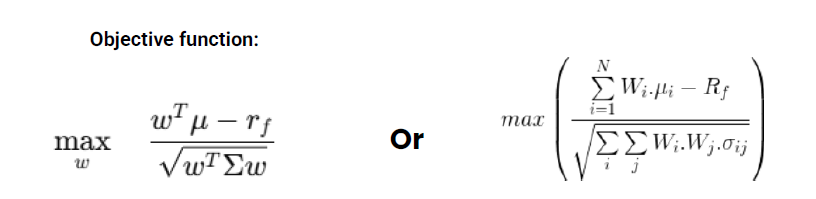

#there is some constraint with detailed formulation and report has been shown in readme file

In [1]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize
import matplotlib.pyplot as plt

In [2]:

filename = "/content/drive/MyDrive/data set/shares_Data.xlsx"

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Accessing the price data from file

In [5]:
price_data = pd.read_excel(filename, sheet_name='Sheet1')
dates = price_data.iloc[:,0]
stocks = price_data.columns[1:]  # Stock names
stocks

Index(['ITC', 'INFY', 'TATACOMM', 'FORTIS', 'ICICIBANK', 'ADANIPOWER',
       'JUBLPHARMA', 'ZENSARTECH', 'RPOWER', 'RBLBANK'],
      dtype='object')

In [6]:
price_data.head()

,Date,ITC,INFY,TATACOMM,FORTIS,ICICIBANK,ADANIPOWER,JUBLPHARMA,ZENSARTECH,RPOWER,RBLBANK
0,2019-04-01,297.25,755.1,610.55,136.60,398.25,48.70,670.60,230.6,10.95,679.80
1,2019-04-02,297.90,759.4,604.85,137.05,397.15,50.05,685.90,232.9,10.75,678.75
2,2019-04-03,296.15,753.3,599.00,136.40,392.10,49.40,699.25,230.1,10.45,663.05
3,2019-04-04,294.80,747.9,595.75,136.80,388.75,47.95,718.80,231.2,10.30,649.25
4,2019-04-05,294.55,759.3,603.55,136.75,390.55,49.85,708.90,230.9,10.50,671.05


In [7]:
price_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1261 entries, 0 to 1260
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        1261 non-null   datetime64[ns]
 1   ITC         1261 non-null   float64       
 2   INFY        1261 non-null   float64       
 3   TATACOMM    1261 non-null   float64       
 4   FORTIS      1261 non-null   float64       
 5   ICICIBANK   1261 non-null   float64       
 6   ADANIPOWER  1261 non-null   float64       
 7   JUBLPHARMA  1261 non-null   float64       
 8   ZENSARTECH  1261 non-null   float64       
 9   RPOWER      1261 non-null   float64       
 10  RBLBANK     1261 non-null   float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 108.5 KB


In [9]:
price_data.duplicated().sum()

np.int64(2)

In [10]:
price_data.columns

Index(['Date  ', 'ITC', 'INFY', 'TATACOMM', 'FORTIS', 'ICICIBANK',
       'ADANIPOWER', 'JUBLPHARMA', 'ZENSARTECH', 'RPOWER', 'RBLBANK'],
      dtype='object')

**Dropping duplicates from price data for matching the total dates nos.**

In [11]:

price_data.drop_duplicates(inplace=True)
price_data.reset_index(drop=True, inplace=True)

price_data.columns = price_data.columns.str.strip()
price_data.columns

Index(['Date', 'ITC', 'INFY', 'TATACOMM', 'FORTIS', 'ICICIBANK', 'ADANIPOWER',
       'JUBLPHARMA', 'ZENSARTECH', 'RPOWER', 'RBLBANK'],
      dtype='object')

In [12]:
price_data.duplicated().sum()

np.int64(0)

 - `pct_change()`:

Calculates the percentage change between consecutive days — i.e.,

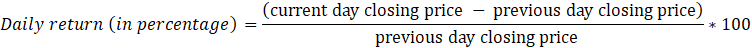

- `reset_index(drop=True, inplace=True)`:

Resets the row index after dropping NaNs to keep the DataFrame clean and sequential.

In [13]:
# Convert Prices to simple Returns
returns = price_data.iloc[:, 1:].pct_change().dropna() * 100
returns.reset_index(drop=True, inplace=True)
returns

,ITC,INFY,TATACOMM,FORTIS,ICICIBANK,ADANIPOWER,JUBLPHARMA,ZENSARTECH,RPOWER,RBLBANK
0,0.218671,0.569461,-0.933584,0.329429,-0.276208,2.772074,2.281539,0.997398,-1.826484,-0.154457
1,-0.587445,-0.803266,-0.967182,-0.474279,-1.271560,-1.298701,1.946348,-1.202233,-2.790698,-2.313076
2,-0.455850,-0.716846,-0.542571,0.293255,-0.854374,-2.935223,2.795853,0.478053,-1.435407,-2.081291
3,-0.084803,1.524268,1.309274,-0.036550,0.463023,3.962461,-1.377295,-0.129758,1.941748,3.357720
4,-0.611102,1.047017,-1.839119,-1.170018,-0.883370,0.702106,-1.290732,0.173235,-2.857143,-2.250205
...,...,...,...,...,...,...,...,...,...,...
1253,1.744807,-2.949122,1.300736,2.082342,0.881200,-1.589509,0.261051,1.702524,4.942966,-3.360000
1254,-0.221652,-1.073665,1.831529,0.804290,0.580810,-1.550790,0.729040,1.074373,0.181159,0.629139
1255,0.081843,-0.589555,-0.952335,1.318224,0.187332,-0.381541,1.006376,-0.955834,2.169982,-2.105956
1256,0.081776,0.956970,-0.018986,-0.707601,0.934003,1.477293,-1.354625,-0.168053,2.300885,3.361345


  ▶  **Calculate the covariance matrix from the correlation matrix and standard deviations**

`cov_matrix = correlation_matrix * np.outer(std_dev, std_dev) / 100`

 np.outer(std_dev, std_dev) creates an outer product of the standard deviations,
resulting in a matrix where each element (i, j) is the product of the
 standard deviation of stock i and the standard deviation of stock j.



In [14]:
# Calculate the standard deviation of returns for each stock
std_dev = returns.std()

print("Standard Deviations of Stock Returns:")
print(std_dev)

# Calculate the correlation matrix
correlation_matrix = returns.corr()


print("\nCorrelation Matrix:")
print(correlation_matrix)

# Calculate the covariance matrix from the correlation matrix and standard deviations
cov_matrix = correlation_matrix * np.outer(std_dev, std_dev) / 100




Standard Deviations of Stock Returns:
ITC           1.636919
INFY          1.811827
TATACOMM      2.630042
FORTIS        2.071257
ICICIBANK     2.043315
ADANIPOWER    3.507663
JUBLPHARMA    2.705964
ZENSARTECH    2.816949
RPOWER        4.304311
RBLBANK       3.460945
dtype: float64

Correlation Matrix:
                 ITC      INFY  TATACOMM    FORTIS  ICICIBANK  ADANIPOWER  \
ITC         1.000000  0.037714  0.086771  0.091605   0.110833    0.040876   
INFY        0.037714  1.000000  0.049823  0.047139  -0.055859    0.118437   
TATACOMM    0.086771  0.049823  1.000000  0.087926   0.107631    0.028559   
FORTIS      0.091605  0.047139  0.087926  1.000000   0.124398    0.045817   
ICICIBANK   0.110833 -0.055859  0.107631  0.124398   1.000000    0.096363   
ADANIPOWER  0.040876  0.118437  0.028559  0.045817   0.096363    1.000000   
JUBLPHARMA  0.123913  0.041289  0.091742  0.010939   0.113863    0.067661   
ZENSARTECH  0.021964  0.032826  0.086667  0.047189   0.148727   -0.016090   
RPO

#covariance matrix as heatmap

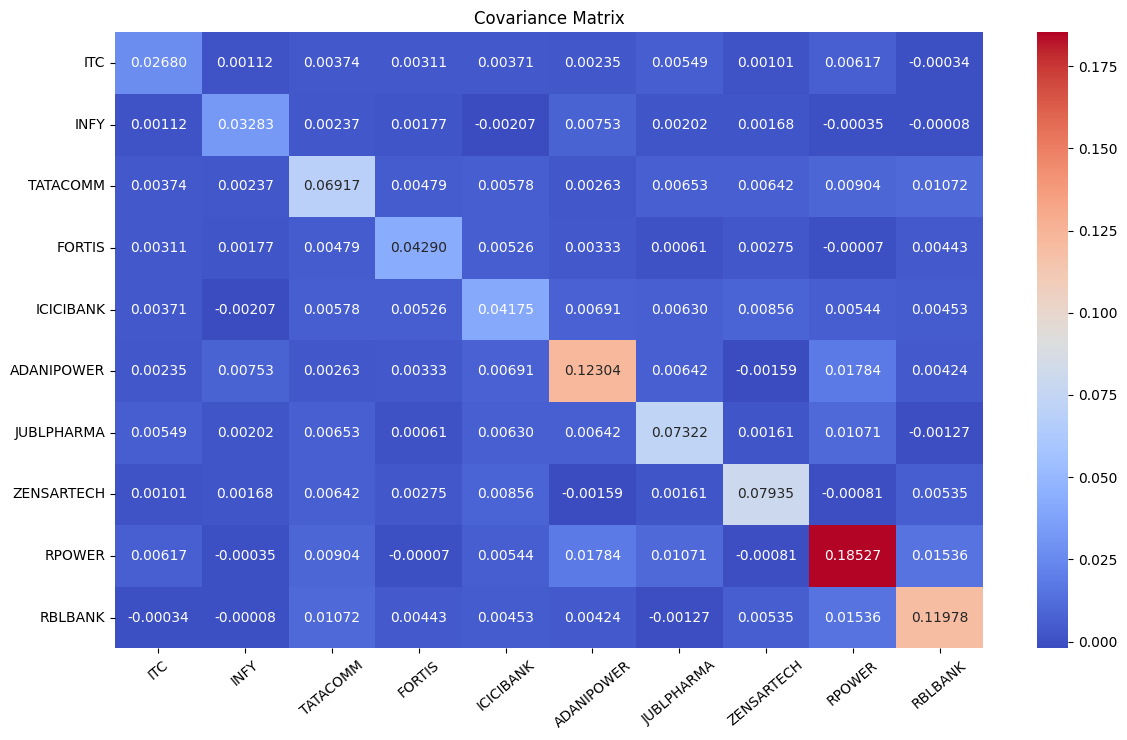

In [77]:
import seaborn as sns
plt.figure(figsize=(14, 8))
sns.heatmap(cov_matrix, annot=True, cmap='coolwarm', fmt=".5f")
plt.title('Covariance Matrix')
plt.xticks(rotation=40)
plt.show()

#📊 **Insight: Above covariance Matrix Heatmap**
---
The heatmap above visualizes the covariances between daily returns of different stocks. A few key observations:

🔴 Highest covariance is observed between RPOWER and ZENSARTECH (≈ 0.185), suggesting these stocks tend to move together more strongly than others.

🟠 **ADANIPOWER** and **JUBL PHARMA** also show moderately high covariance (≈ 0.123), indicating a **potential dependency**.

🔵 Most stock pairs show very low or near-zero covariance, implying relatively independent movements — ideal for diversification.

In [15]:

#@title Calculate the mean returns(%) for each stock
mean_return = returns.mean()
mean_returns = pd.DataFrame(mean_return).transpose()
mean_returns

,ITC,INFY,TATACOMM,FORTIS,ICICIBANK,ADANIPOWER,JUBLPHARMA,ZENSARTECH,RPOWER,RBLBANK
0,0.042178,0.07085,0.130523,0.114575,0.101917,0.255293,0.025048,0.114347,0.170161,-0.01785


In [16]:
num_stocks = len(stocks)
num_stocks

10

In [17]:
# @title equal weighted portfolio
#return from an equal allocation (1/n for n stocks)

equal_weights = np.array([1/num_stocks] * num_stocks)
portfolio_return = np.dot(equal_weights, mean_returns.values.flatten())

print(f"Portfolio return with equal allocation (1/{num_stocks}) to each stock: {portfolio_return*100:.4f} %")


Portfolio return with equal allocation (1/10) to each stock: 10.0704 %


In [18]:
#@title Risk-free rate (daily)
risk_free_rate = (1 + 0.063)**(1/252) - 1 # we assumed risk free rate is 6.3% and 252 trading days in a year
risk_free_rate

0.00024247026163837226

**Load sector data**

In [20]:
sectors_data = pd.read_excel(filename, sheet_name='Sheet2')
sectors_data

,Sector,FMCG,Healthcare,IT,Banking,Energy,Telecomunication
0,ITC,1,0,0,0,0,0
1,INFY,0,0,1,0,0,0
2,TATACOMM,0,0,0,0,0,1
3,FORTIS,0,1,0,0,0,0
4,ICICIBANK,0,0,0,1,0,0
5,ADANIPOWER,0,0,0,0,1,0
6,JUBLPHARMA,0,1,0,0,0,0
7,ZENSARTECH,0,0,1,0,0,0
8,RPOWER,0,0,0,0,1,0
9,RBLBANK,0,0,0,1,0,0


#Objective function

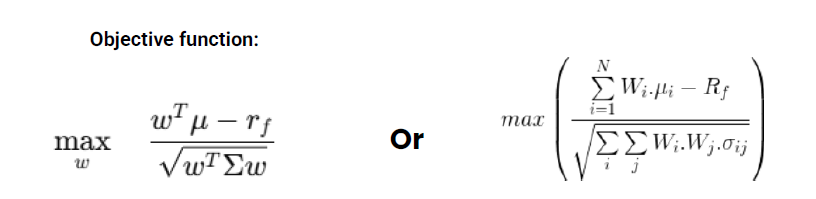

In [19]:
def sharpe_ratio(w):
    portfolio_return = np.dot(w, mean_returns.values.flatten())
    portfolio_risk = np.sqrt(np.dot(w.T, np.dot(cov_matrix, w)))

    return -((portfolio_return - risk_free_rate) / portfolio_risk) # obj func

#Constraints

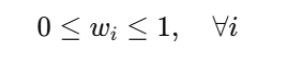

In [44]:
constraints = ({'type': 'eq', 'fun': lambda w: np.sum(w) - 1})  # Full investment constraint

lb = np.zeros(num_stocks) # minimum 0% alloaction (no short selling)
ub = np.ones(num_stocks)  # max 100 % is possible
bounds = tuple(zip(lb, ub))

**generate Random liquidity**

In [21]:
#generate Random liquidity
L = np.random.randint(20000,500000, (num_stocks,1))  #we can Replace with actual liquidity scores
for i,stock in enumerate(price_data.columns[1:]):
    print(f"{stock}: {L[i]}") # randomly generated liquidity for 10 stocks

ITC: [406358]
INFY: [344685]
TATACOMM: [498200]
FORTIS: [399900]
ICICIBANK: [206671]
ADANIPOWER: [133800]
JUBLPHARMA: [112834]
ZENSARTECH: [103930]
RPOWER: [135569]
RBLBANK: [377833]


**Load ESG Scores**

In [22]:
# Load ESG Scores
esg_data = pd.read_excel(filename, sheet_name='ESG')
esg_scores = esg_data.iloc[:, 1].values
esg_data

,Stocks,ESG_score
0,ITC,28
1,INFY,69
2,TATACOMM,56
3,FORTIS,30
4,ICICIBANK,42
5,ADANIPOWER,68
6,JUBLPHARMA,65
7,ZENSARTECH,56
8,RPOWER,59
9,RBLBANK,42


#🧪**Parametric Stress Testing of Portfolio Optimization**
---
To understand how different investment constraints affect portfolio performance, we conducted a comprehensive parameter testing across multiple constraint dimensions and optimized the portfolio under each combination.

# 🔁 **What We Varied:**
1. **Sector Allocation Bounds**   

 - Lower Bound (LB): 10% to 90% (step 20%)

 - Upper Bound (UB): 20% to 100% (step 20%)
    
 - Condition: `LB < UB` ⇒ 15 valid (LB, UB) combinations

2. **Volatility Cap (`σ_max`)**   

 - Ranged from 1% to 30% with 5% step

 - 6 possible values

3. **Minimum ESG Score**

 - Thresholds: 35, 50, 65, 80

 - 4 values based on real-world ESG guidelines

4. **Liquidity Threshold (L_min)**

 - Values: 40k, 120k, ..., up to 440k

 - 6 different liquidity limits

#⚙️ **What the Code Does:**
1. For every possible combination of these constraint values (15 × 6 × 4 × 6 = 2160 iterations), the code:

2. Defines constraints dynamically based on current parameters.

3. Runs portfolio optimization using scipy.optimize.minimize() to maximize Sharpe Ratio under:

 - Budget constraint

 - Sector weight bounds

 - Volatility cap

 - ESG score minimum

 - Liquidity threshold

4. Captures whether the optimization was successful, along with:
 - All results are logged and stored into a final `DataFrame` for easy analysis.

---

#**⚠ NOTE:**  
#Why Fixed Constraint Values?

We used predefined or article-based values for constraints to avoid billions of iterations that a full grid search would require. This controlled, discrete sampling (guided by real-world practices) helps balance computational efficiency with insightful exploration.

In [68]:

sector_lbs = list(range(10, 101, 20)) #>> 5
sector_ubs = list(range(20, 101, 20)) # >>5
# maintaining the condition lb < ub >>15 iteration

sigma_max_values = np.arange(0.01, 0.31, 0.05)       # we took 5% jump , >> 6 iteration //( usually don't need much more volatility than 26% as per source)
esg_min_values = list(range(35, 90, 15))             # 35, 45, 55... 95 >> 4 iteration  (usually not less than 35 as per different article )
L_min_values = list(range(40000, 460000, 80000))    #40k, 120k,200k, 280k, 360k, 440k >>6 iteration

# total iteration = 15 * 6 * 4 *6 = 2160
results = []

for sector_lb in sector_lbs:
    for sector_ub in sector_ubs:
        if sector_lb < sector_ub:
            for sigma_max in sigma_max_values:
                for ESG_min in esg_min_values:
                    for L_min in L_min_values:
                        print(f"Trying combination: Sector LB={sector_lb/100:.2f}, Sector UB={sector_ub/100:.2f}, Sigma Max={sigma_max:.2f}, ESG Min={ESG_min}, L Min={L_min}")

                        # Reset constraints for the current combination
                        current_constraints = [{'type': 'eq', 'fun': lambda w: np.sum(w) - 1}]

                        # Sector Constraints
                        for sector in sectors_data.columns[1:]:
                            sector_indices = np.where(sectors_data[sector] == 1)[0]
                            current_constraints.append({'type': 'ineq', 'fun': lambda w, idx=sector_indices: sector_ub/100 - np.sum(w[idx])})
                            current_constraints.append({'type': 'ineq', 'fun': lambda w, idx=sector_indices: np.sum(w[idx]) - sector_lb/100})

                        # Maximum Volatility Constraint
                        def current_max_volatility(w):
                            return sigma_max - np.sqrt(np.dot(w.T, np.dot(cov_matrix, w)))
                        current_constraints.append({'type': 'ineq', 'fun': current_max_volatility})

                        # Liquidity constraint
                        def current_liquidity_constraint(w):
                             # Ensure L is defined in this scope or accessible
                            return np.sum( L * w) - L_min
                        current_constraints.append({'type': 'ineq', 'fun': current_liquidity_constraint})

                        # ESG Constraint
                        def current_esg_constraint(w):
                            # Ensure esg_scores is defined in this scope or accessible
                            return np.dot(w, esg_scores) - ESG_min
                        current_constraints.append({'type': 'ineq', 'fun': current_esg_constraint})


                        # Initial guess (equal weights)
                        initial_weights = np.array([1/num_stocks] * num_stocks)

                        # Optimize the portfolio
                        try:
                            optimization_result = minimize(sharpe_ratio, initial_weights, method='SLSQP', bounds=bounds, constraints=current_constraints)

                            if optimization_result.success:
                                opt_w = optimization_result.x
                                portfolio_return = np.dot(opt_w, mean_returns.values.flatten())
                                portfolio_risk = np.sqrt(np.dot(opt_w.T, np.dot(cov_matrix, opt_w)))
                                sharpe = (portfolio_return - risk_free_rate) / portfolio_risk

                                result_entry = {
                                    'Sector_LB': sector_lb/100,
                                    'Sector_UB': sector_ub/100,
                                    'Sigma_Max': sigma_max,
                                    'ESG_Min': ESG_min,
                                    'L_Min': L_min,
                                    'Optimization_Successful': True,
                                    'Optimal_Weights': opt_w,
                                    'Portfolio_Return': portfolio_return,
                                    'Portfolio_Risk': portfolio_risk,
                                    'Sharpe_Ratio': sharpe
                                }
                                results.append(result_entry)
                                print("  Optimization successful.")

                            else:
                                result_entry = {
                                    'Sector_LB': sector_lb/100,
                                    'Sector_UB': sector_ub/100,
                                    'Sigma_Max': sigma_max,
                                    'ESG_Min': ESG_min,
                                    'L_Min': L_min,
                                    'Optimization_Successful': False,
                                    'Message': optimization_result.message
                                }
                                results.append(result_entry)
                                print(f"  Optimization failed: {optimization_result.message}")
                        except Exception as e:
                             result_entry = {
                                    'Sector_LB': sector_lb/100,
                                    'Sector_UB': sector_ub/100,
                                    'Sigma_Max': sigma_max,
                                    'ESG_Min': ESG_min,
                                    'L_Min': L_min,
                                    'Optimization_Successful': False,
                                    'Message': f"Error during optimization: {e}"
                                }
                             results.append(result_entry)
                             print(f"  Error during optimization: {e}")

#  convert to a DataFrame for easier analysis:
results_df = pd.DataFrame(results)

# Filter for successful optimizations
successful_results = results_df[results_df['Optimization_Successful']]

# Print or analyze the successful results
print("\n--- Summary of Successful Optimizations ---")
print(successful_results[['Sector_LB', 'Sector_UB', 'Sigma_Max', 'ESG_Min', 'L_Min', 'Sharpe_Ratio', 'Portfolio_Risk', 'Portfolio_Return']].head())

# For instance, to see the weights for the optimization with the highest Sharpe Ratio:
if not successful_results.empty:
    best_result = successful_results.loc[successful_results['Sharpe_Ratio'].idxmax()]
    print("\n--- Best Optimization by Sharpe Ratio ---")
    print(best_result[['Sector_LB', 'Sector_UB', 'Sigma_Max', 'ESG_Min', 'L_Min', 'Sharpe_Ratio', 'Portfolio_Risk', 'Portfolio_Return']])
    print("\nOptimal Weights for Best Result:")
    # Convert the array of weights to a series with stock names as index for better readability
    best_weights_series = pd.Series(best_result['Optimal_Weights'], index=stocks)
best_weights_series


Trying combination: Sector LB=0.10, Sector UB=0.20, Sigma Max=0.01, ESG Min=35, L Min=40000
  Optimization failed: Positive directional derivative for linesearch
Trying combination: Sector LB=0.10, Sector UB=0.20, Sigma Max=0.01, ESG Min=35, L Min=120000
  Optimization failed: Positive directional derivative for linesearch
Trying combination: Sector LB=0.10, Sector UB=0.20, Sigma Max=0.01, ESG Min=35, L Min=200000
  Optimization failed: Positive directional derivative for linesearch
Trying combination: Sector LB=0.10, Sector UB=0.20, Sigma Max=0.01, ESG Min=35, L Min=280000
  Optimization failed: Positive directional derivative for linesearch
Trying combination: Sector LB=0.10, Sector UB=0.20, Sigma Max=0.01, ESG Min=35, L Min=360000
  Optimization failed: Positive directional derivative for linesearch
Trying combination: Sector LB=0.10, Sector UB=0.20, Sigma Max=0.01, ESG Min=35, L Min=440000
  Optimization failed: Positive directional derivative for linesearch
Trying combination: Sec

,0
ITC,1.000000e-01
INFY,1.429338e-01
TATACOMM,1.181702e-01
FORTIS,1.867539e-01
ICICIBANK,1.290135e-01
ADANIPOWER,1.617092e-01
JUBLPHARMA,8.571519e-17
ZENSARTECH,1.033781e-01
RPOWER,5.804116e-02
RBLBANK,0.000000e+00



#📈 **Purpose and Insights from above:**
This exhaustive grid search approach helps in:

- Identifying the most favorable constraint combination for high Sharpe Ratio

- Understanding sensitivity of portfolio performance to ESG, risk, liquidity, and sector exposure

- Supporting robust portfolio design by revealing trade-offs between constraints

Displaying 5 random samples of `results`

In [25]:
results_df.sample(5)


,Sector_LB,Sector_UB,Sigma_Max,ESG_Min,L_Min,Optimization_Successful,Message,Optimal_Weights,Portfolio_Return,Portfolio_Risk,Sharpe_Ratio
657,0.1,1.0,0.16,50,280000,True,NaN,[1.00000000e-01 1.42792324e-01 1.18209403e-01 ...,0.127335,0.109463,1.161056
1150,0.3,0.8,0.26,80,360000,False,Positive directional derivative for linesearch,NaN,NaN,NaN,NaN
1493,0.5,0.8,0.11,35,440000,False,Positive directional derivative for linesearch,NaN,NaN,NaN,NaN
383,0.1,0.6,0.16,80,440000,False,Positive directional derivative for linesearch,NaN,NaN,NaN,NaN
43,0.1,0.2,0.06,80,120000,False,Positive directional derivative for linesearch,NaN,NaN,NaN,NaN


**we build this result's csv file so you can see the iteration results clearly. You can find it in the folder where all results are computed**

In [73]:
# converted results into result_df for better clearing
results_df.to_csv('optimization_results.csv', index=False)

In [35]:
# @title Filter for successful optimizations and shows top 5
successful_results = results_df[results_df['Optimization_Successful']]
print(successful_results.shape)
# total 240 succcessfull cases

successful_results.sort_values(by='Sharpe_Ratio',ascending=False).head()  # top 5 successfull result

(240, 11)


,Sector_LB,Sector_UB,Sigma_Max,ESG_Min,L_Min,Optimization_Successful,Message,Optimal_Weights,Portfolio_Return,Portfolio_Risk,Sharpe_Ratio
343,0.1,0.6,0.11,50,120000,True,NaN,[1.00000000e-01 1.42933809e-01 1.18170249e-01 ...,0.127295,0.109428,1.161056
342,0.1,0.6,0.11,50,40000,True,NaN,[1.00000000e-01 1.42933809e-01 1.18170249e-01 ...,0.127295,0.109428,1.161056
344,0.1,0.6,0.11,50,200000,True,NaN,[1.00000000e-01 1.42933809e-01 1.18170249e-01 ...,0.127295,0.109428,1.161056
345,0.1,0.6,0.11,50,280000,True,NaN,[1.00000000e-01 1.42933809e-01 1.18170249e-01 ...,0.127295,0.109428,1.161056
346,0.1,0.6,0.11,50,360000,True,NaN,[1.00000000e-01 1.42933809e-01 1.18170249e-01 ...,0.127295,0.109428,1.161056


In [50]:
successful_results.loc[successful_results['Sharpe_Ratio'].idxmax()]['Optimal_Weights'] # best result's optimal wt

array([1.00000000e-01, 1.42933809e-01, 1.18170249e-01, 1.86753922e-01,
       1.29013490e-01, 1.61709239e-01, 8.57151872e-17, 1.03378130e-01,
       5.80411624e-02, 0.00000000e+00])

# **Print and analyze the successful results**

###The code extracts and displays:

- A random sample of 5 successful portfolio optimization results (from successful_results DataFrame).

- The best portfolio configuration, determined by the highest Sharpe Ratio.

- The corresponding optimal stock weights are printed as a pandas.Series for readability.




In [51]:

print("\n--- Summary of Successful Optimizations ---")
print(successful_results[['Sector_LB', 'Sector_UB', 'Sigma_Max', 'ESG_Min', 'L_Min', 'Sharpe_Ratio', 'Portfolio_Risk', 'Portfolio_Return']].sample(5)) # displaying any 5 successfull result

# For instance, to see the weights for the optimization with the highest Sharpe Ratio:
if not successful_results.empty:
    best_result = successful_results.loc[successful_results['Sharpe_Ratio'].idxmax()]

    print("\nOptimal Weights for Best Result:")
    # Convert the array of weights to a series with stock names as index for better readability
    best_weights_series = pd.Series(np.round(best_result['Optimal_Weights'],4) , index=stocks)
best_weights_series



--- Summary of Successful Optimizations ---
     Sector_LB  Sector_UB  Sigma_Max  ESG_Min   L_Min  Sharpe_Ratio  \
250        0.1        0.4       0.21       50  360000      1.161056   
198        0.1        0.4       0.11       50   40000      1.161056   
557        0.1        0.8       0.26       35  440000      1.161056   
222        0.1        0.4       0.16       50   40000      1.161056   
80         0.1        0.2       0.16       50  200000      1.149006   

     Portfolio_Risk  Portfolio_Return  
250        0.109424          0.127290  
198        0.109431          0.127298  
557        0.109419          0.127284  
222        0.109424          0.127290  
80         0.109211          0.125726  

Optimal Weights for Best Result:


,0
ITC,0.1000
INFY,0.1429
TATACOMM,0.1182
FORTIS,0.1868
ICICIBANK,0.1290
ADANIPOWER,0.1617
JUBLPHARMA,0.0000
ZENSARTECH,0.1034
RPOWER,0.0580
RBLBANK,0.0000


# 📊 **Insights from Output**


#### 🧮 Optimal Allocation
- **Highest weights**:  
  - FORTIS (18.7%)  
  - ADANIPOWER (16.2%)  
  - INFY (14.3%)  
- **Zero allocation**:  
  - JUBL PHARMA, RBL BANK  
- → Suggests these stocks didn’t meet expected return/risk under given constraints


#### 🌐 Diversification
- Weights are spread across **7 out of 10 stocks**, avoiding overconcentration
- No single stock exceeds **~19%**, adhering to sector and risk limits


#**Optiaml constrain results**

In [29]:
    print("\n--- Best Optimization by Sharpe Ratio ---")
    best_result[['Sector_LB', 'Sector_UB', 'Sigma_Max', 'ESG_Min', 'L_Min', 'Sharpe_Ratio', 'Portfolio_Risk', 'Portfolio_Return']].T


--- Best Optimization by Sharpe Ratio ---


,342
Sector_LB,0.1
Sector_UB,0.6
Sigma_Max,0.11
ESG_Min,50
L_Min,40000
Sharpe_Ratio,1.161056
Portfolio_Risk,0.109428
Portfolio_Return,0.127295


#**Insights from above**
#### Top Sharpe Ratio ≈ 1.161
 - Achieved under varying combinations of:
  - Sector bounds: **LB = 10%, UB = 40%**
  - Volatility cap: **up to 26%**
  - ESG score: **≥ 50**
  - Liquidity minimums: **₹40k to ₹500k**


#### 🔁 Risk-Return Tradeoff
- All top portfolios hover around:
  - **Risk ≈ 10.9%**
  - **Return ≈ 12.7%**
- → Indicates a **stable region** of high Sharpe ratios



#**Optimization result**

we have shown all optimal and final ouput

In [52]:

# Select the optimization result with the highest Sharpe Ratio

optimal_weights = best_result['Optimal_Weights']
optimal_portfolio_return = best_result['Portfolio_Return']
optimal_portfolio_risk = best_result['Portfolio_Risk']
optimal_sharpe_ratio = best_result['Sharpe_Ratio']

print("\n--- Final Optimal Portfolio based on Maximum Sharpe Ratio ---")
print(f"Optimal Portfolio Return (Daily): {100*optimal_portfolio_return:.3f}%")
print(f"Optimal Portfolio Risk (Daily Std Dev): {100*optimal_portfolio_risk:.3f}%")
print(f"Optimal Sharpe Ratio: {optimal_sharpe_ratio:.4f}")
print("\nOptimal Allocation (Weights):")

    # Create a DataFrame or Series for optimal weights for better visualization
optimal_allocation_df = pd.DataFrame({'Stock': stocks, 'Weight (%)':np.round(optimal_weights,4)*100 })
optimal_allocation_df



--- Final Optimal Portfolio based on Maximum Sharpe Ratio ---
Optimal Portfolio Return (Daily): 12.730%
Optimal Portfolio Risk (Daily Std Dev): 10.943%
Optimal Sharpe Ratio: 1.1611

Optimal Allocation (Weights):


,Stock,Weight (%)
0,ITC,10.00
1,INFY,14.29
2,TATACOMM,11.82
3,FORTIS,18.68
4,ICICIBANK,12.90
5,ADANIPOWER,16.17
6,JUBLPHARMA,0.00
7,ZENSARTECH,10.34
8,RPOWER,5.80
9,RBLBANK,0.00


#**Bar plot of optimal weight allocation**

<ipython-input-54-250361325eb3>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Stock', y='Weight (%)', data = optimal_allocation_df, palette = 'Paired')


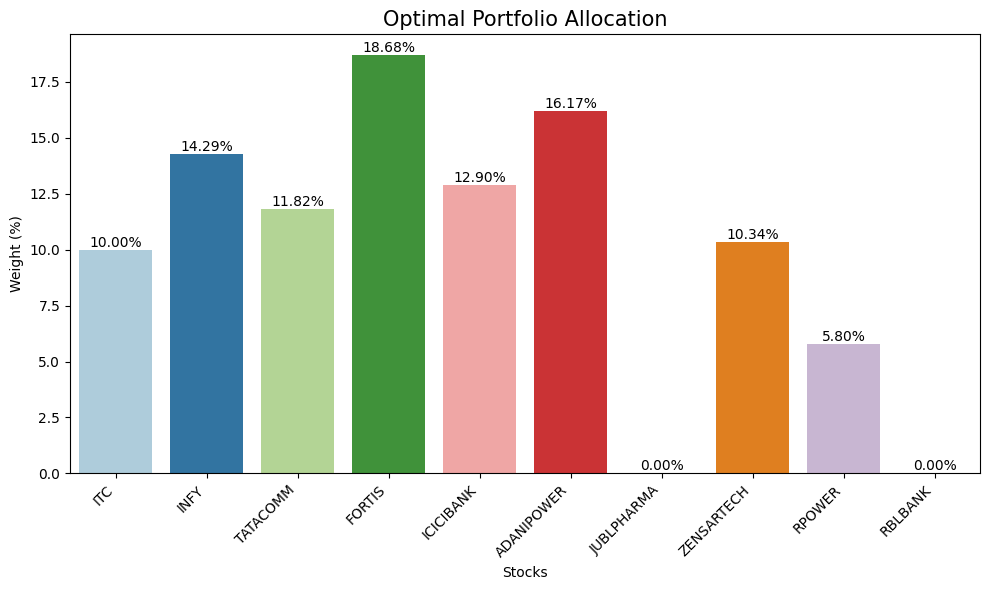

In [54]:
import seaborn as sns

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Stock', y='Weight (%)', data = optimal_allocation_df, palette = 'Paired')
plt.title('Optimal Portfolio Allocation',fontsize=15)
plt.xlabel('Stocks')
plt.ylabel('Weight (%)')
plt.xticks(rotation=45, ha='right')

# Add the weight values on top of the bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f%%', label_type='edge')

plt.tight_layout()
plt.show()



# **Pie chart of optimal weight allocation to all stocks**

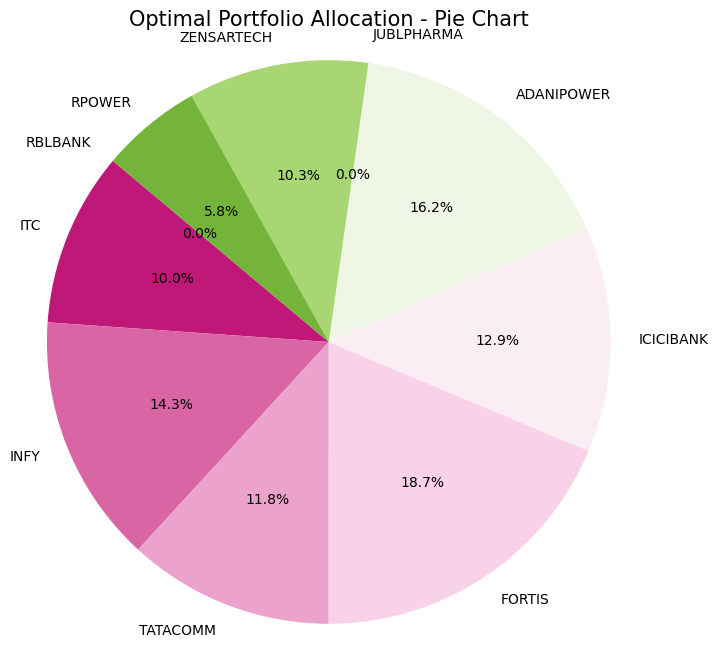

In [129]:

plt.figure(figsize=(8, 8))
plt.pie(optimal_allocation_df['Weight (%)'], labels=optimal_allocation_df['Stock'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('PiYG', len(optimal_allocation_df)))
plt.title('Optimal Portfolio Allocation - Pie Chart', fontsize=15)
plt.axis('equal')  # Equal aspect ratio
plt.show()

#**Optimized Weights allocated to Sectors**

In [59]:
print(sectors_data )

       Sector  FMCG  Healthcare  IT  Banking  Energy  Telecomunication
0         ITC     1           0   0        0       0                 0
1        INFY     0           0   1        0       0                 0
2    TATACOMM     0           0   0        0       0                 1
3      FORTIS     0           1   0        0       0                 0
4   ICICIBANK     0           0   0        1       0                 0
5  ADANIPOWER     0           0   0        0       1                 0
6  JUBLPHARMA     0           1   0        0       0                 0
7  ZENSARTECH     0           0   1        0       0                 0
8      RPOWER     0           0   0        0       1                 0
9     RBLBANK     0           0   0        1       0                 0


### 🏢 **Sector-wise Portfolio Allocation**

To better understand how the optimized portfolio is distributed across different industry sectors, we mapped each stock to its respective sector using the `sectors_data` table. Then we:

1. **Mapped Stocks to Sectors**  
   Each stock was tagged with its sector based on one-hot encoded values in the dataset.

2. **Merged Sector Info with Optimal Weights**  
   We combined the optimal stock weights with their respective sectors.

3. **Aggregated Sector Weights**  
   Total allocation per sector was calculated by summing the weights of all stocks belonging to each sector.

4. **Visualized Sector Allocation**  
   A pie chart was plotted to show the **proportion of investment across sectors**.

This visualization helps assess whether the final portfolio maintains **sectoral diversification** and adheres to any imposed sector constraints (e.g., min 10%, max 60% allocation per sector).



Sector-wise Optimal Allocation:
             Sector  Sector Weight (%)
0           Banking              12.90
1            Energy              21.97
2              FMCG              10.00
3        Healthcare              18.68
4                IT              24.63
5  Telecomunication              11.82


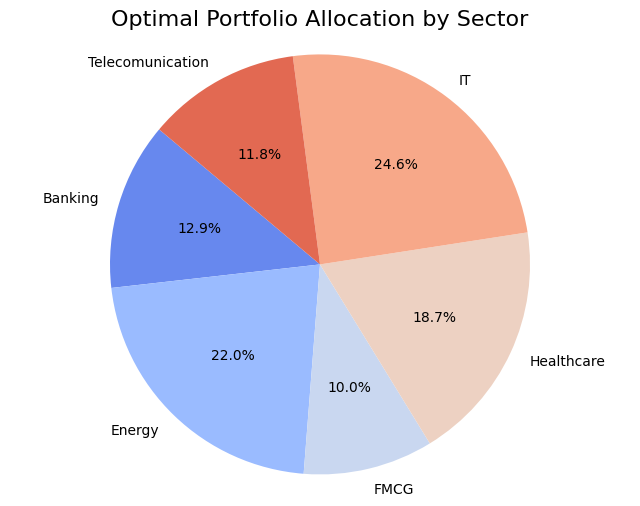

In [60]:

# Map stocks to sectors based on sectors_data
stock_to_sector = {}
for index, row in sectors_data.iterrows():
    stock_name = row['Sector']
    for sector_name in sectors_data.columns[1:]:
        if row[sector_name] == 1:
            stock_to_sector[stock_name] = sector_name
            break # a stock belongs to only one sector

# Merge optimal weights with sector information
optimal_allocation_df['Sector'] = optimal_allocation_df['Stock'].map(stock_to_sector)

# Calculate sector-wise allocation
sector_allocation = optimal_allocation_df.groupby('Sector')['Weight (%)'].sum().reset_index()
sector_allocation.rename(columns={'Weight (%)': 'Sector Weight (%)'}, inplace=True)

print("\nSector-wise Optimal Allocation:")
print(sector_allocation)

# Plot sector-wise allocation in a pie chart
plt.figure(figsize=(8, 6))
plt.pie(sector_allocation['Sector Weight (%)'], labels=sector_allocation['Sector'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('coolwarm', len(sector_allocation)))
plt.title('Optimal Portfolio Allocation by Sector', fontsize=16)
plt.axis('equal')
plt.show()

### 🧠 **Insight: Sector-wise Allocation**

The optimal portfolio demonstrates **balanced diversification across sectors**, while respecting sector constraints:

-  **IT** has the **highest allocation (24.6%)**, suggesting strong expected return and/or low associated risk.
- **Energy (22.0%)** and **Healthcare (18.7%)** follow with significant weights, indicating their strong contribution to the Sharpe Ratio.
-  **Banking (12.9%)** and **Telecommunication (11.8%)** offer moderate exposure.
-  **FMCG (10.0%)** is at the **minimum sector allocation limit**, implying less favorable risk-return profile under current constraints.

> The allocation ensures sectoral **diversification**, adheres to the **min-max bounds**, and supports **optimal risk-adjusted performance**.


In [57]:
#@title Merged optimal allocation df with sector
optimal_allocation_df

,Stock,Weight (%),Sector
0,ITC,10.00,FMCG
1,INFY,14.29,IT
2,TATACOMM,11.82,Telecomunication
3,FORTIS,18.68,Healthcare
4,ICICIBANK,12.90,Banking
5,ADANIPOWER,16.17,Energy
6,JUBLPHARMA,0.00,Healthcare
7,ZENSARTECH,10.34,IT
8,RPOWER,5.80,Energy
9,RBLBANK,0.00,Banking


# **Plotting some graph for better understanding**
### Calculate cumulative % returns for each stock

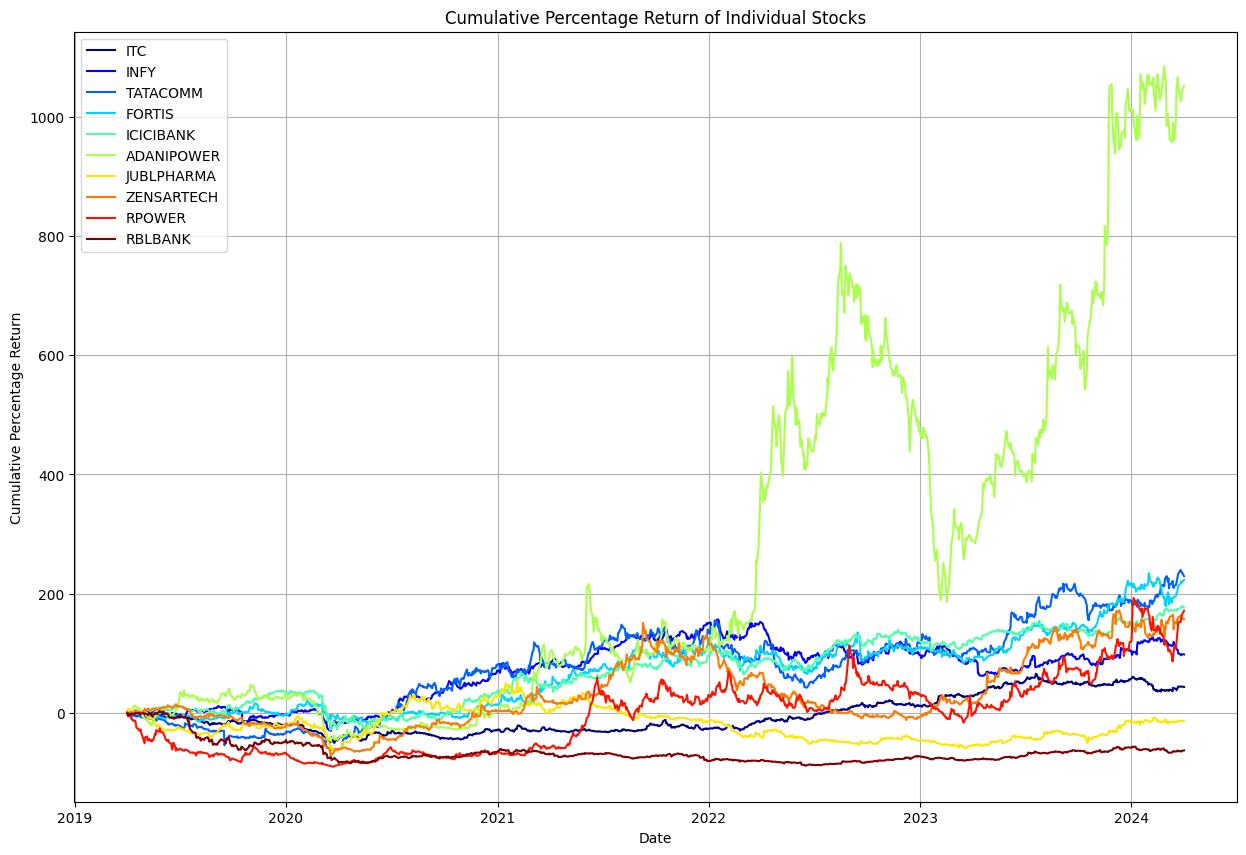

In [154]:

plt.figure(figsize=(15, 10))
colors = plt.cm.jet(np.linspace(0, 1, len(stocks))) # Use a colormap for better visualization

for i, stock in enumerate(stocks):
    cumulative_returns = (1 + returns[stock] / 100).cumprod() - 1
    plt.plot(price_data['Date'][1:], cumulative_returns*100, label=stock, color=colors[i])

plt.xlabel("Date")
plt.ylabel("Cumulative Percentage Return")
plt.title("Cumulative Percentage Return of Individual Stocks")
plt.legend()
plt.grid(True)
plt.show()


# **Sector-Wise Cumulative Return Analysis (2019–2024)**



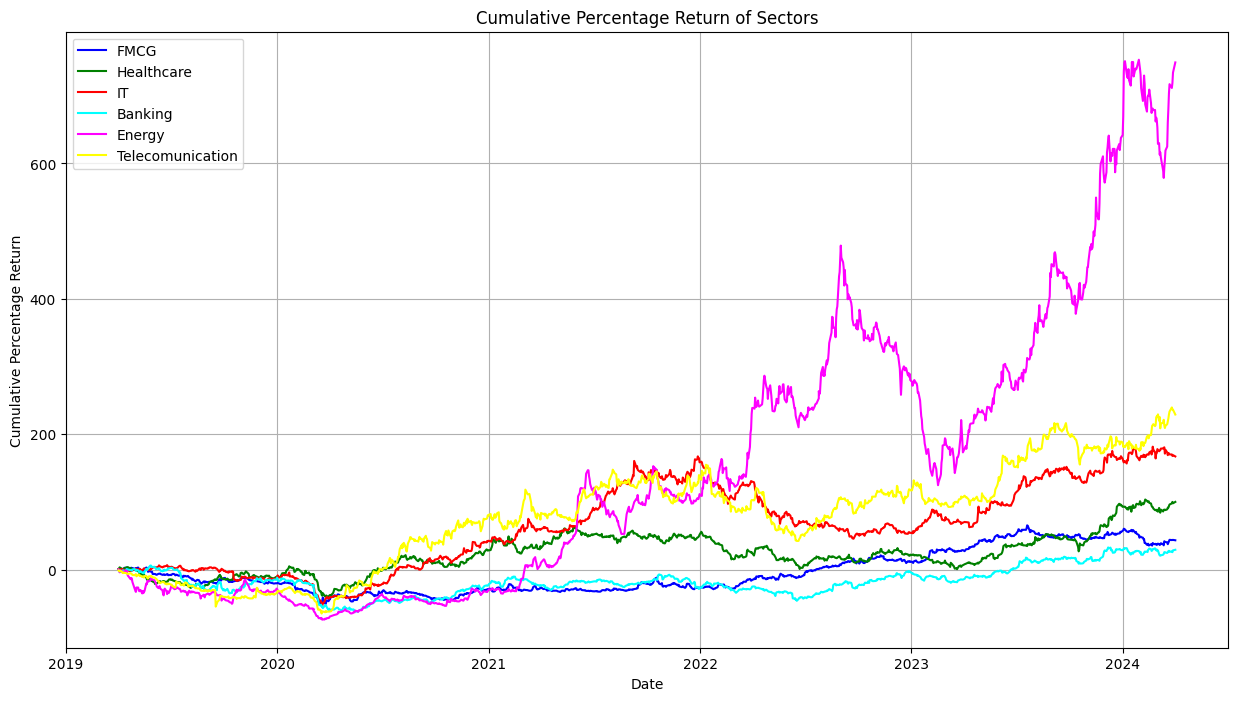

In [157]:

from matplotlib import pyplot as plt
# Group stocks by sector and calculate average returns
sector_returns = {}
for sector in sectors_data.columns[1:]:
    sector_stocks = sectors_data[sectors_data[sector] == 1].index
    if not sector_stocks.empty:
      sector_returns[sector] = returns.iloc[:, sector_stocks].mean(axis=1)


plt.figure(figsize=(15, 8))

colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow']

# Plot each sector's cumulative returns with different colors
for i, (sector, sector_return) in enumerate(sector_returns.items()):
    cumulative_returns = (1 + sector_return / 100).cumprod() - 1
    plt.plot(price_data['Date'][1:], cumulative_returns*100, label=sector, color=colors[i % len(colors)])

plt.xlabel("Date")
plt.ylabel("Cumulative Percentage Return")
plt.title("Cumulative Percentage Return of Sectors")
plt.legend()
plt.grid(True)
plt.show()


 ## **Insights from above:**

The graph displays the cumulative percentage return of six major sectors over the period from 2019 to 2024. These sectors are:

- FMCG (Blue),
- Healthcare (Green),
- IT (Red),
- Banking (Cyan),
- Energy (Magenta),
- Telecommunication (Yellow)

---

# 🎲 **Monte Carlo Simulation: Efficient Frontier**

**Monte Carlo simulation** is a computational technique that uses random sampling to model and analyze complex systems. In the context of portfolio optimization, it involves creating thousands of hypothetical portfolios by randomly assigning weights to the assets within the portfolio. In our case we have done 10000 simulations here.

---
To explore the risk-return landscape of possible portfolios, we performed a **Monte Carlo simulation** by randomly generating **10,000** different portfolio weight combinations:

#### ⚙️ Steps Performed:
- **Random Weights Generation**:  
  Each simulation generated random portfolio weights that sum to 1.

- **Performance Calculation**:
  - **Expected Return**: Calculated using the dot product of weights and mean returns.
  - **Expected Volatility**: Derived using the covariance matrix.
  - **Sharpe Ratio**: Computed for each simulated portfolio.

- **Visualization**:
  - A **scatter plot** was used to represent portfolios in return-volatility space.
  - Each point is **color-coded by Sharpe Ratio**, providing an intuitive view of risk-adjusted performance.
  - The **black star** marks the previously optimized portfolio with the highest Sharpe Ratio.




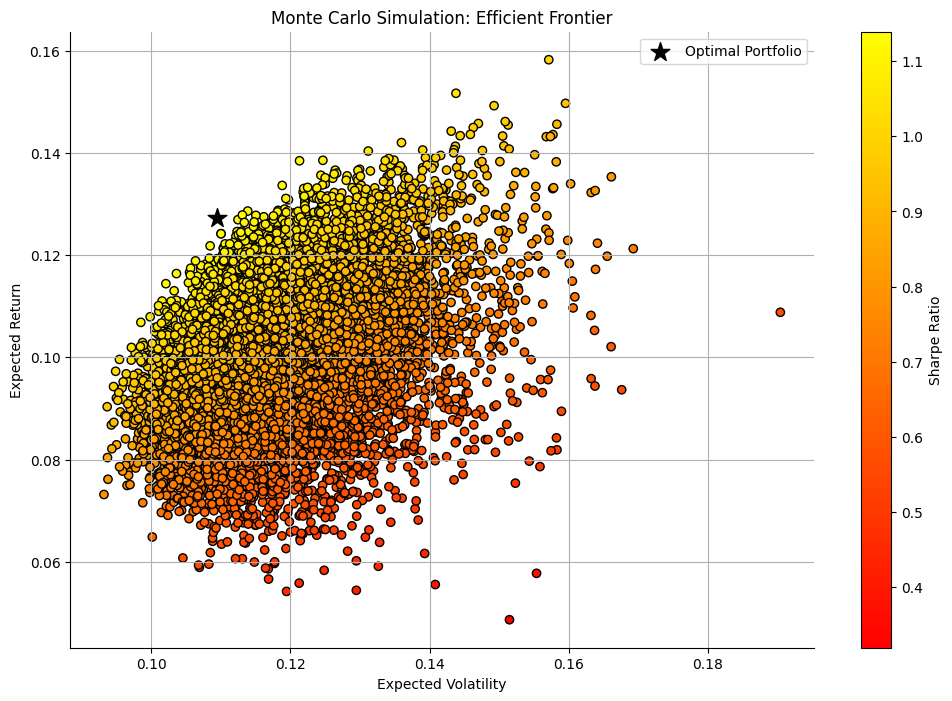

In [164]:

import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap


num_simulations = 10000

# Generate random portfolio weights
weights = np.random.rand(num_simulations, num_stocks)
weights = weights / np.sum(weights, axis=1, keepdims=True)

# Calculate portfolio returns and volatilities
portfolio_returns = np.dot(weights, mean_returns.values.flatten())
portfolio_volatilities = np.sqrt(np.diag(np.dot(weights, np.dot(cov_matrix.values, weights.T))))

# Calculate Sharpe ratios
sharpe_ratios = (portfolio_returns - risk_free_rate) / portfolio_volatilities

colors = [(1, 0, 0), (1, 0.5, 0), (1, 1, 0)]
cmap_name = 'my_cmap'
cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=256)

# Scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(portfolio_volatilities, portfolio_returns, c=sharpe_ratios, cmap=cm, edgecolors='black')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')
plt.title('Monte Carlo Simulation: Efficient Frontier')

plt.scatter(optimal_portfolio_risk, optimal_portfolio_return, marker='*', s=200, color='black', label='Optimal Portfolio')

# Improve plot aesthetics
plt.grid(True)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.legend()
plt.show()


### 📈 **Insight from Monte carlo:**
- The resulting cloud of points forms the **Efficient Frontier**, where portfolios closer to the upper-left corner offer **higher returns at lower risk**.
- The optimal portfolio lies on or near the frontier, confirming its superiority in **risk-adjusted performance** compared to randomly generated portfolios.

> ✅ This visual reinforces the value of optimization by highlighting how rare it is to randomly stumble upon a portfolio as efficient as the one produced through Sharpe Ratio maximization.

# 🔎 **Sector-Wise Risk Analysis**

This section computes and visualizes the **risk (variance)** contribution from each sector in the optimized portfolio.

#### 🛠️ Method:
- For each sector, we:
  - Extracted the weights and covariance matrix subset of the stocks belonging to that sector.
  - Calculated sector-wise risk using the formula:  
 `sector_risk = np.dot(sector_weights.T, np.dot(sector_cov_matrix, sector_weights))`

- Displayed results as a **bar chart** to compare risk exposure across sectors.

---

### 📊 Insight:

- ⚡ **Energy sector** carries the **highest risk (≈ 0.0042)**, likely due to higher volatility of its constituent stocks.
- 💻 **IT (0.0016)** and 🏥 **Healthcare (0.0015)** are moderately risky sectors.
- 🏦 **Banking (0.0007)** and 📡 **Telecommunication (0.0010)** show lower risk contributions.
-  📦 **FMCG** has the **lowest sector risk (≈ 0.0003)**, making it the most stable segment in the portfolio.

> ✅ This analysis provides a clear view of how each sector contributes to overall portfolio volatility, helping in risk-aware decision-making.



Sector Risks:
FMCG: 0.000268
Healthcare: 0.001496
IT: 0.001568
Banking: 0.000695
Energy: 0.004176
Telecomunication: 0.000966


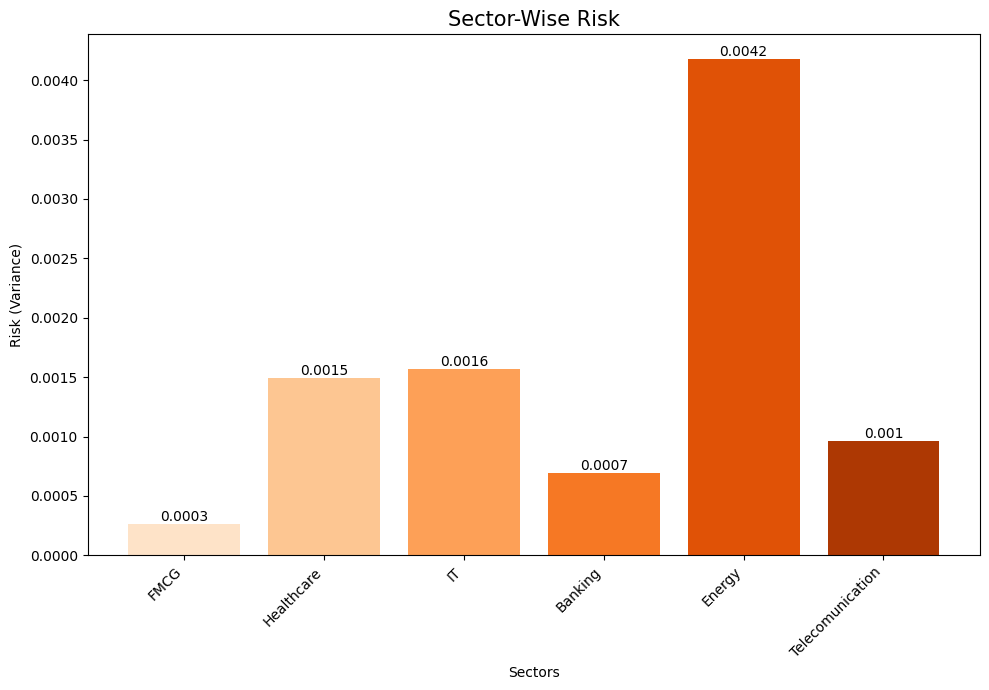

In [75]:


import numpy as np
import pandas as pd


# Calculate sector-wise risk (variance)
sector_risks = {}
for sector in sectors_data.columns[1:]:
    sector_indices = np.where(sectors_data[sector] == 1)[0]
    sector_weights = optimal_weights[sector_indices]
    sector_cov_matrix = cov_matrix.iloc[sector_indices, sector_indices]
    sector_risk = np.dot(sector_weights.T, np.dot(sector_cov_matrix, sector_weights))
    sector_risks[sector] = sector_risk


# Print sector risks
print("\nSector Risks:")
for sector, risk in sector_risks.items():
    print(f"{sector}: {risk:.6f}")

# Plotting Sector Risks
sectors = list(sector_risks.keys())
risks = list(sector_risks.values())

plt.figure(figsize=(10, 7))
plt.bar(sectors, risks, color = sns.color_palette(palette='Oranges'))
plt.xlabel("Sectors")
plt.ylabel("Risk (Variance)")
plt.title("Sector-Wise Risk", fontsize = 15)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

for i , v in enumerate(risks):
  plt.text(i, v , str(np.round(v,4)), ha='center', va='bottom', fontsize = 10)


plt.show()


#📌 **Individual Stock Risk Analysis**

This section evaluates the **risk contribution of each stock** in the optimized portfolio. Risk is calculated using the diagonal of the covariance matrix (i.e., the stock's variance) and its corresponding portfolio weight.



#### 🛠️ Method:  
- For each stock, risk is estimated as:
   `Wi * Wi* Cov(i,i)`
  where:
  - Wi = weight of stock **i** in the portfolio  
  - Cov(i,i) = co-variance of stock **i** and **i** (from the covariance matrix diagonal) -> in this case it is actually variance

- Results are visualized in a **bar chart** for easy comparison.

---

### 📊 Insight:

- 🔺 **ADANIPOWER** has the **highest individual risk (≈ 0.0567)**, suggesting high volatility or a relatively large allocation.
- 🔹 Followed by **FORTIS (0.0387)**, **TATACOMM (0.0311)**, and **ZENSARTECH (0.0291)** — all contributing moderately to portfolio volatility.
- 🟢 **ITC (0.0164)** and **RPOWER (0.0250)** exhibit relatively lower individual risk.
- ⚠️ **JUBL PHARMA** and **RBL BANK** have **zero risk contribution**, aligning with their **0% allocation** in the optimal portfolio.

> ✅ This analysis confirms that higher weights or higher variance directly increase individual stock risk, helping identify which stocks drive overall portfolio volatility.



Individual Stock Risks:
ITC: 0.016369
INFY: 0.025897
TATACOMM: 0.031079
FORTIS: 0.038682
ICICIBANK: 0.026362
ADANIPOWER: 0.056722
JUBLPHARMA: 0.000000
ZENSARTECH: 0.029121
RPOWER: 0.024983
RBLBANK: 0.000000


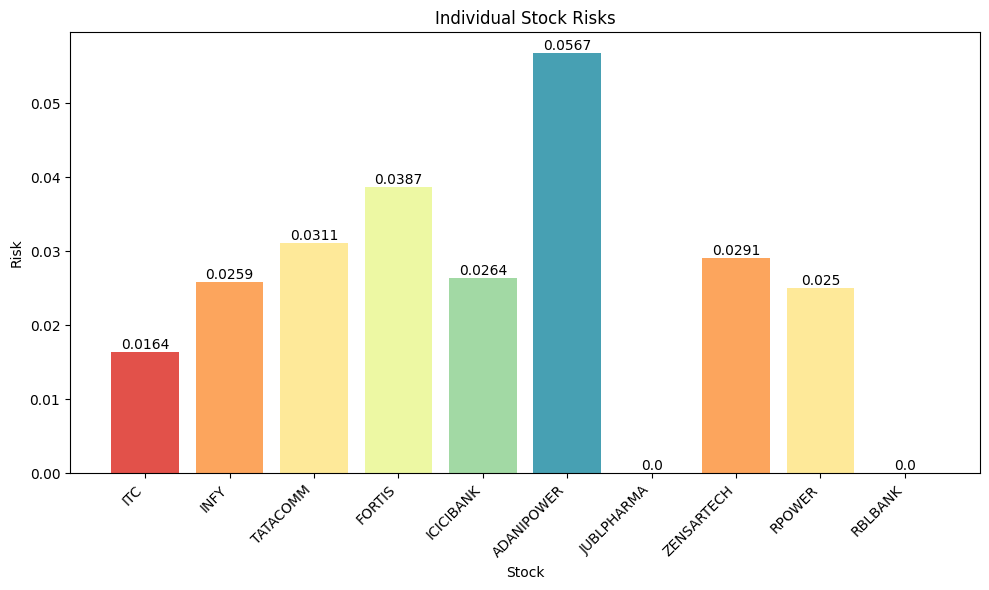

In [73]:

individual_stock_risks = {}
for i in range(len(stocks)):
    risk = np.sqrt(optimal_weights[i] * optimal_weights[i] * cov_matrix.iloc[i, i])  # Assuming i=j as per the formula
    individual_stock_risks[stocks[i]] = risk

# Print individual stock risks
print("\nIndividual Stock Risks:")
for stock, risk in individual_stock_risks.items():
    print(f"{stock}: {risk:.6f}")

# Plotting individual stock risks
stocks_list = list(individual_stock_risks.keys())
risks_list = list(individual_stock_risks.values())


plt.figure(figsize=(10, 6))
plt.bar(stocks_list, risks_list, color=sns.color_palette(palette='Spectral') )
plt.xlabel("Stock")
plt.ylabel("Risk")
plt.title("Individual Stock Risks")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

for i , v in enumerate(risks_list):
  plt.text(i, v , str(np.round(v,4)), ha='center', va='bottom', fontsize = 10)
plt.show()
